In [146]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('train.csv')
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Viral')))

df = df.reindex(columns=cols)

X = df.iloc[:, 2:].values
Y = df.iloc[:, 0].values

from sklearn.manifold import Isomap
embedding = Isomap(n_components=3)
X_isomap= embedding.fit_transform(X)

Text(0, 0.5, '2nd principle feature')

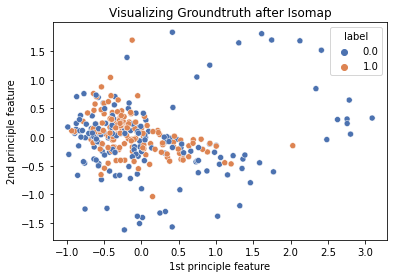

In [147]:
#visualize ground-truth after isomap
data=X_isomap
label=df["Viral"].to_numpy()

import seaborn as sns
df1=pd.DataFrame(data)
df1["label"]=df["Viral"]
sns.scatterplot(data=df1, x=0, y=1, hue="label", palette="deep").set(title='Visualizing Groundtruth after Isomap')
plt.xlabel("1st principle feature")
plt.ylabel("2nd principle feature")

In [148]:
from sklearn.decomposition import PCA
X_std= StandardScaler().fit_transform(X)
pca= PCA(n_components=5)
X_pca =pca.fit_transform(X_std)

import seaborn as sns
data2=X_pca
label=df["Viral"].to_numpy()

In [149]:
#kmeans -PCA
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(data2).predict(data2)
print("done")

done


In [150]:
#kmeans-Isomap
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data).predict(data)
print("done")

done


Text(0.5, 1.0, 'visualizing k-means cluster')

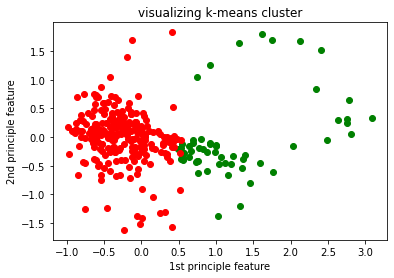

In [151]:
#visualize data 2-D
import matplotlib.pyplot as plt

filtered_label0 = data[kmeans == 0]
filtered_label1 = data[kmeans == 1]

plt.scatter(filtered_label0[:,0] , filtered_label0[:,1],color='green')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.xlabel("1st principle feature")
plt.ylabel("2nd principle feature")
plt.title("visualizing k-means cluster")

In [152]:
#gmm-Isomap
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=2, random_state=0).fit(data)
gm_prob = gm.predict_proba(data)
gm_assign = gm.predict(data)
#df["gmm cluster"]=gm_assign
#hh = pd.DataFrame(gm_prob)
#df["gmm distribution"]=hh.apply(lambda r: tuple(r), axis=1).apply(np.array)
print("done")

done


In [153]:
#gmm- PCA
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=2, random_state=0).fit(data2)
gm_prob2 = gm.predict_proba(data2)
gm_assign2 = gm.predict(data2)
#df["gmm cluster"]=gm_assign
#hh = pd.DataFrame(gm_prob)
#df["gmm distribution"]=hh.apply(lambda r: tuple(r), axis=1).apply(np.array)
print("done")

done


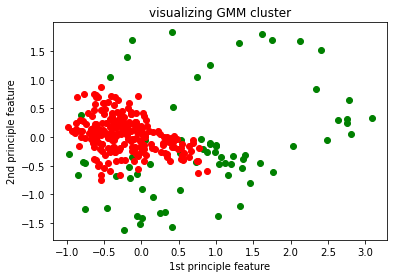

In [154]:
#visualize data
import matplotlib.pyplot as plt
filtered_label0 = data[gm_assign == 0]
filtered_label1 = data[gm_assign == 1]
filtered_label2 = data[gm_assign == 2]
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1],color='green')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue')
plt.title("visualizing GMM cluster")
plt.xlabel("1st principle feature")
plt.ylabel("2nd principle feature")
plt.show()

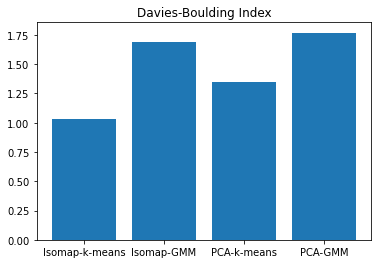

In [155]:
#DB index
from sklearn.metrics import davies_bouldin_score
db_index=[]
db_index.append(davies_bouldin_score(data, kmeans))
db_index.append(davies_bouldin_score(data, gm_assign))
db_index.append(davies_bouldin_score(data2, kmeans2))
db_index.append(davies_bouldin_score(data2, gm_assign2))
plt.bar(["Isomap-k-means","Isomap-GMM","PCA-k-means","PCA-GMM"], db_index,width=0.8)
plt.title('Davies-Boulding Index')
plt.show()

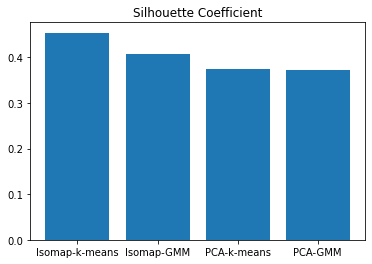

In [158]:
#silhouette coefficient
from sklearn.metrics import silhouette_score
sc=[]
sc.append(silhouette_score(data, kmeans))
sc.append(silhouette_score(data, gm_assign))

sc.append(silhouette_score(data2, kmeans2))
sc.append(silhouette_score(data2, gm_assign2))

plt.bar(["Isomap-k-means","Isomap-GMM","PCA-k-means","PCA-GMM"],sc,width=0.8)
plt.title('Silhouette Coefficient')
plt.show()

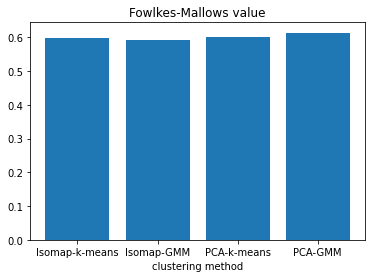

In [159]:
#FM measure
from sklearn.metrics.cluster import fowlkes_mallows_score
fm=[]
fm.append(fowlkes_mallows_score(label,kmeans))
fm.append(fowlkes_mallows_score(label,gm_assign))
fm.append(fowlkes_mallows_score(label,kmeans2))
fm.append(fowlkes_mallows_score(label,gm_assign2))
plt.bar(["Isomap-k-means","Isomap-GMM","PCA-k-means","PCA-GMM"],fm,width=0.8)
plt.title('Fowlkes-Mallows value')
plt.xlabel("clustering method")
plt.show()

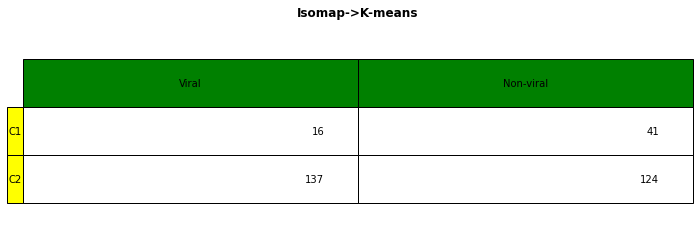

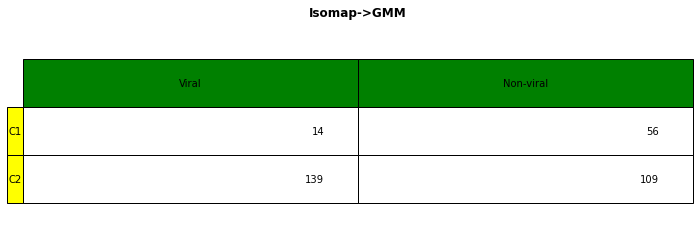

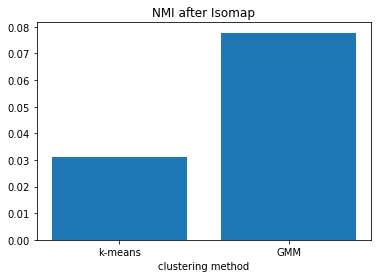

In [176]:
#Entropy-based measures

#cluster/partition table
k11=0 #cluster 0 partition viral
k12=0 #cluster 1 partition viral
k13=0 #cluster 0 partition non-viral
k14=0 #cluster 1 partition non-viral


g11=0 #cluster 0 partition viral
g12=0 #cluster 1 partition viral
g13=0 #cluster 0 partition non-viral
g14=0 #cluster 1 partition non-viral
for i in range(0,data.shape[0]):
    if label[i]==1:
        if kmeans[i]==0:
            k11+=1
        if gm_assign[i]==0:
            g11+=1
        if kmeans[i]==1:
            k12+=1
        if gm_assign[i]==1:
            g12+=1
    else:
        if kmeans[i]==0:
            k13+=1
        if gm_assign[i]==0:
            g13+=1
        if kmeans[i]==1:
            k14+=1
        if gm_assign[i]==1:
            g14+=1

# hide axes
fig, ax =plt.subplots(1,1)
data2=[[k11,k13],
      [k12,k14]]
column_labels=["Viral", "Non-viral"]
ax.axis('tight')
ax.axis('off')
df=pd.DataFrame(data2,columns=column_labels)
the_table=ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["C1","C2"],rowColours =["yellow"] * 2,  
        colColours =["green"] * 2,loc="center")
fontsize = 10
the_table.set_fontsize(fontsize)
the_table.scale(2, 4)
ax.set_title('Isomap->K-means', fontweight ="bold") 
plt.show()


# hide axes
fig, ax = plt.subplots(1,1) 
data3=[[g11,g13],
      [g12,g14]]
column_labels=["Viral", "Non-viral"]
ax.axis('tight')
ax.axis('off')
df=pd.DataFrame(data3,columns=column_labels)
the_table=ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["C1","C2"],rowColours =["yellow"] * 2,  
        colColours =["green"] * 2,loc="center")
fontsize = 10
the_table.set_fontsize(fontsize)
the_table.scale(2, 4)
ax.set_title('Isomap->GMM', fontweight ="bold") 
plt.show()


from sklearn.metrics.cluster import normalized_mutual_info_score
nmi=[]
nmi.append(normalized_mutual_info_score(label,kmeans))
nmi.append(normalized_mutual_info_score(label,gm_assign))
#nmi.append(normalized_mutual_info_score(label,clustering.labels_))
plt.bar(["k-means","GMM"], nmi)
plt.title('NMI after Isomap')
plt.xlabel("clustering method")
plt.show()
